# Importing Libraries


In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

# Uploading Files

In [ ]:
file_path = "D:\Amit_Project\Time_series_forecasting\gold_monthly_csv.csv"
df = pd.read_csv(file_path)

# Time series forecasting

In [5]:
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [7]:
df.shape

(847, 2)

In [8]:
print(f"Date range of gold prices vailable from - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Date range of gold prices vailable from - 1950-01 to 2020-07


In [20]:
date = pd.date_range(start='1/1/1950', end='8/1/2020', freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [22]:
df['month']= date
df.drop('Date', axis=1, inplace=True)
df=df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


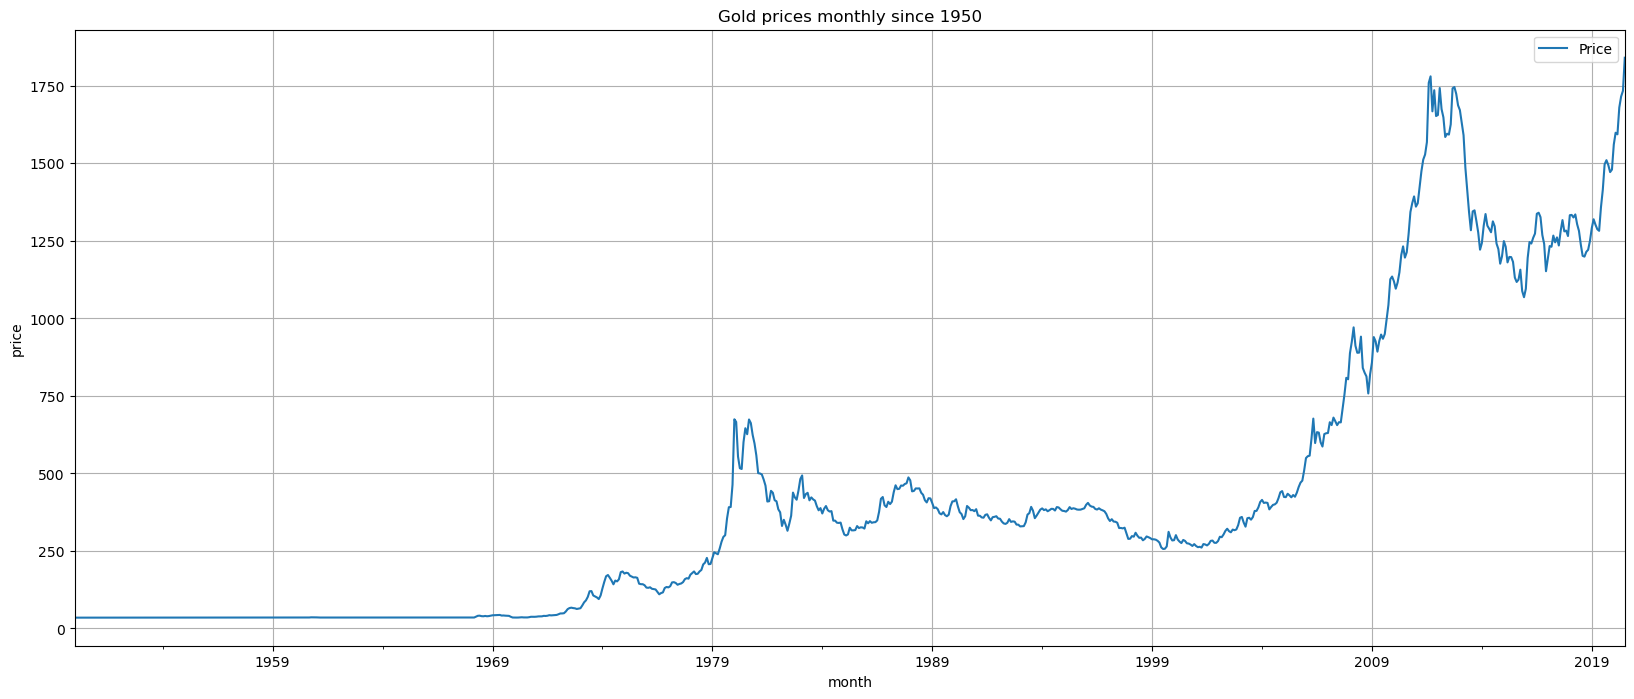

In [26]:
df.plot(figsize=(20,8))
plt.title("Gold prices monthly since 1950")
plt.ylabel("price")
plt.grid()

In [27]:
round(df.describe(), 3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


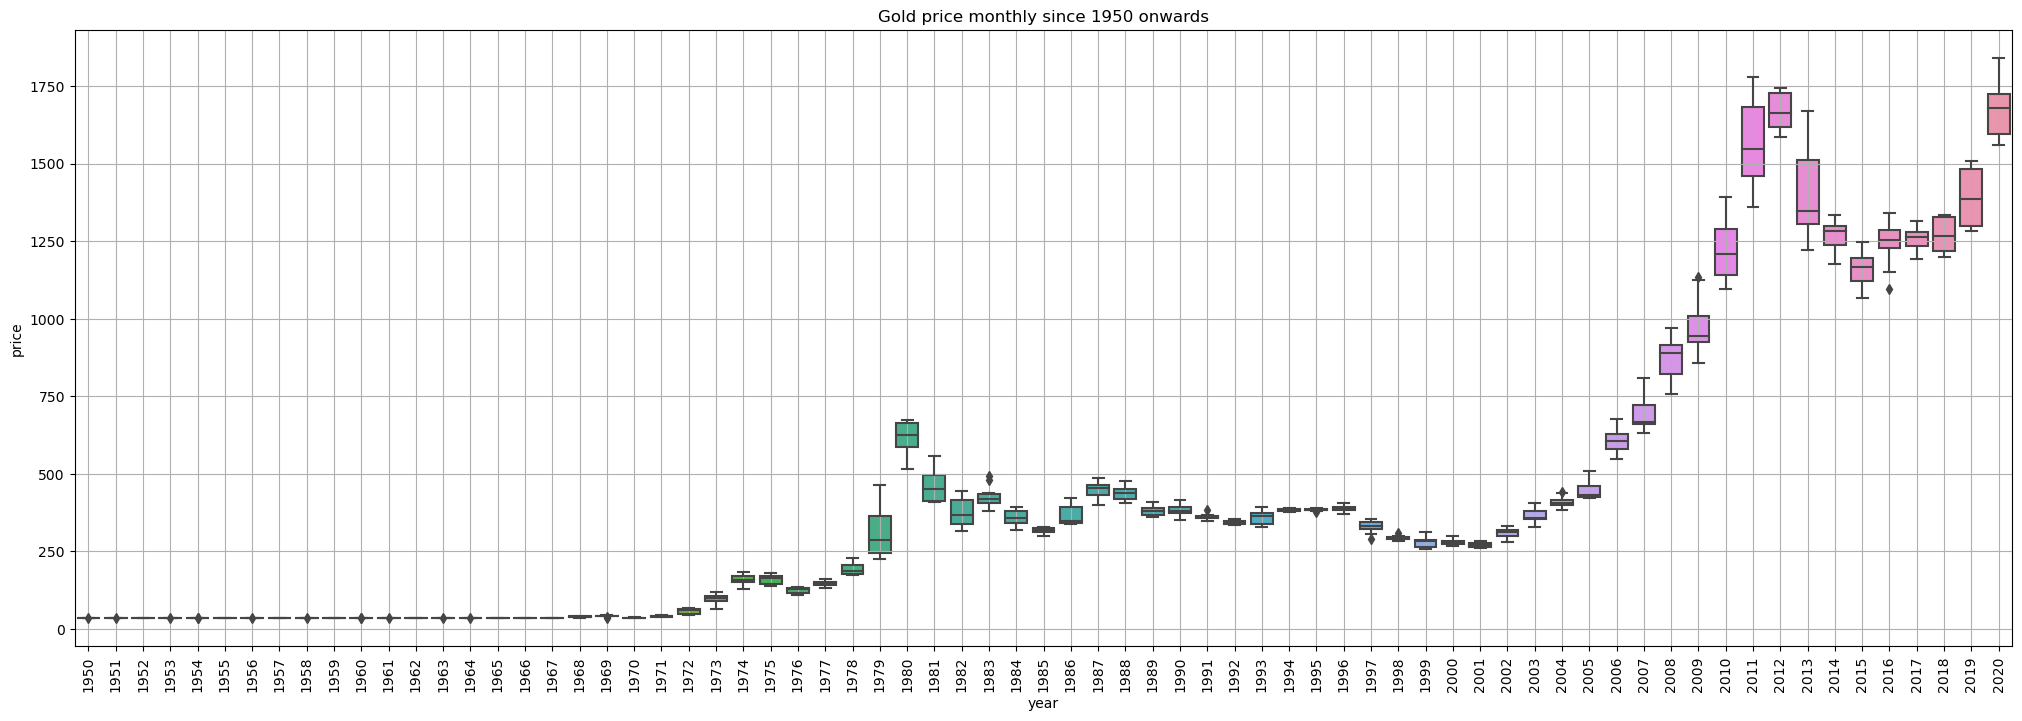

In [30]:
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x=df.index.year, y=df.values[:,0], ax=ax)
plt.title("Gold price monthly since 1950 onwards")
plt.xlabel('year')
plt.ylabel('price')
plt.xticks(rotation = 90)
plt.grid()

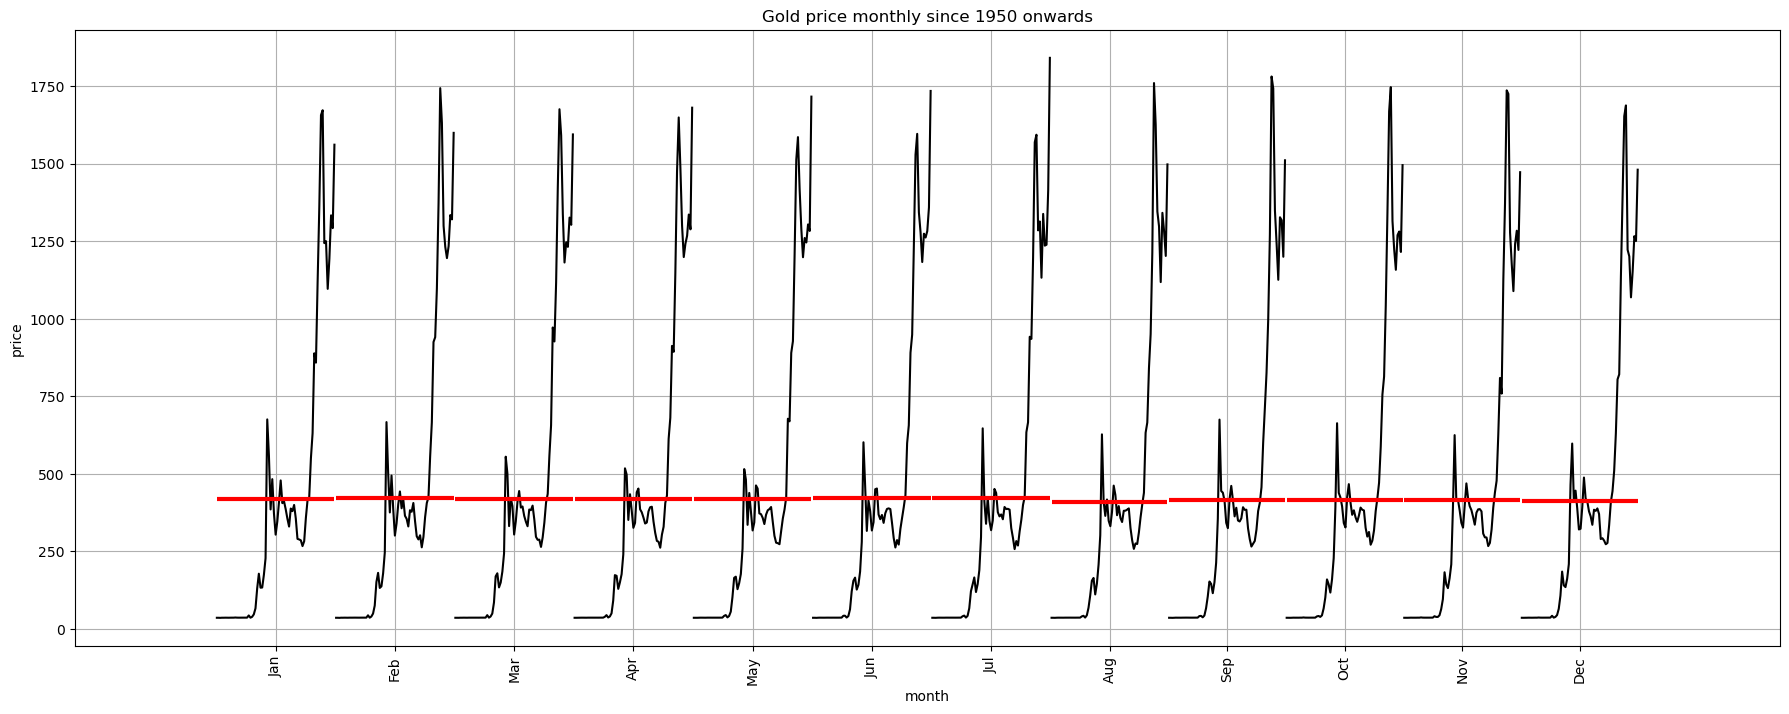

In [32]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))
month_plot(df, ylabel= 'Gold price', ax=ax)
plt.title("Gold price monthly since 1950 onwards")
plt.xlabel('month')
plt.ylabel('price')
plt.xticks(rotation = 90)
plt.grid()

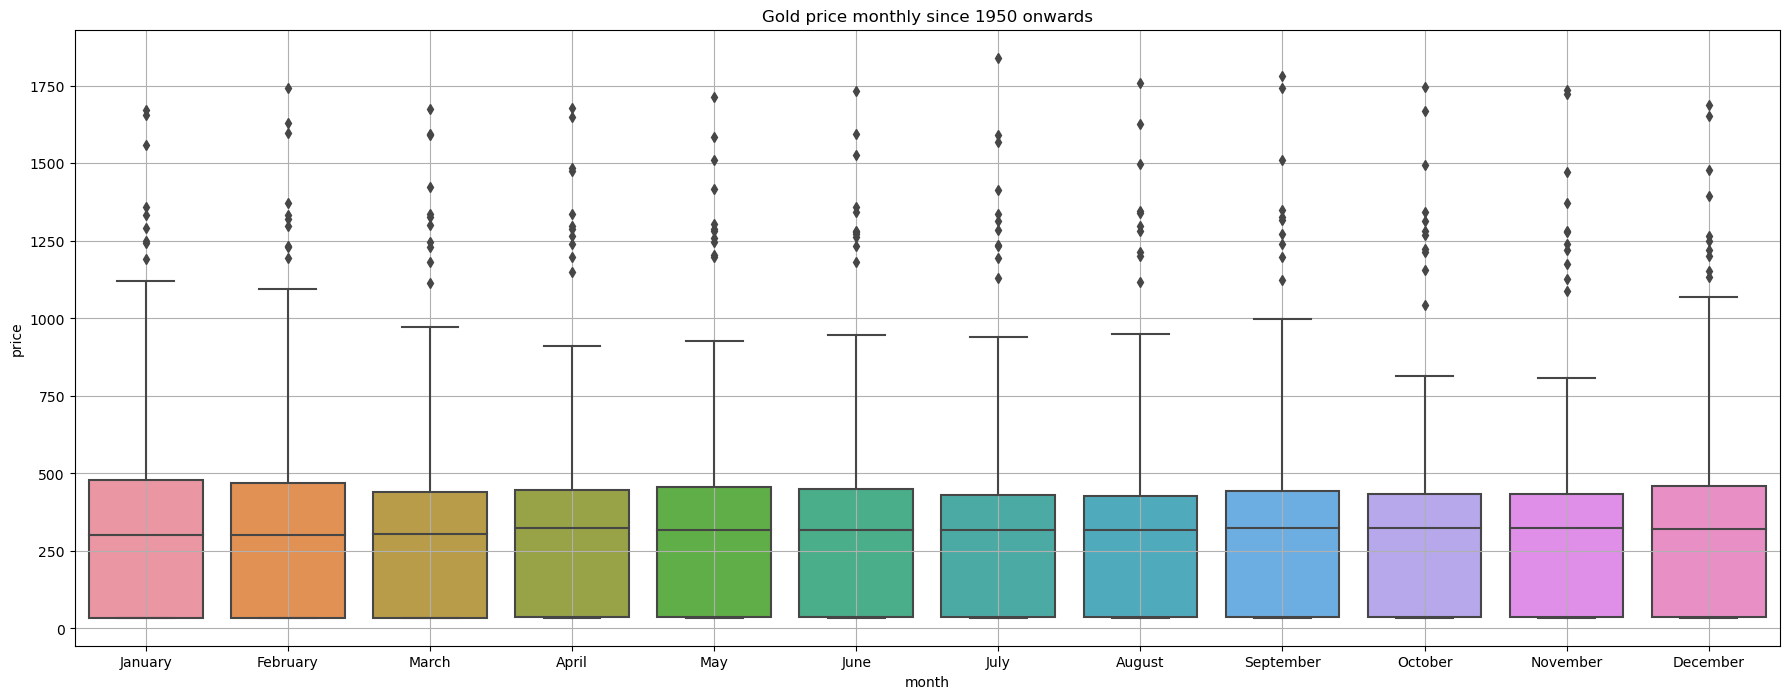

In [33]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(), y = df.values[:,0], ax=ax)
plt.title("Gold price monthly since 1950 onwards")
plt.xlabel('month')
plt.ylabel('price')
plt.grid()

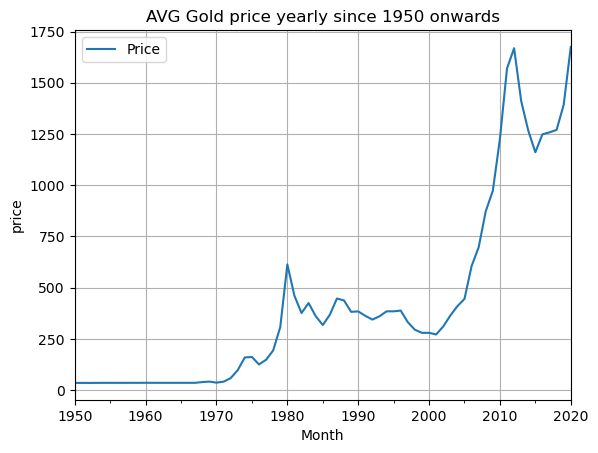

In [55]:
#Avg gold price per year since 1950 
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot()
plt.title("AVG Gold price yearly since 1950 onwards")
plt.xlabel('Month')
plt.ylabel('price')
plt.grid()

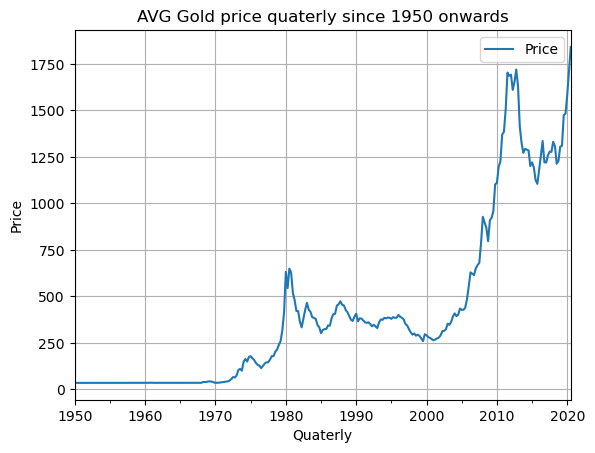

In [40]:
#Avg gold price per Quater since 1950
df_quaterly_sum = df.resample('Q').mean()
df_quaterly_sum.plot();
plt.title("AVG Gold price quaterly since 1950 onwards")
plt.xlabel('Quaterly')
plt.ylabel('Price')
plt.grid()

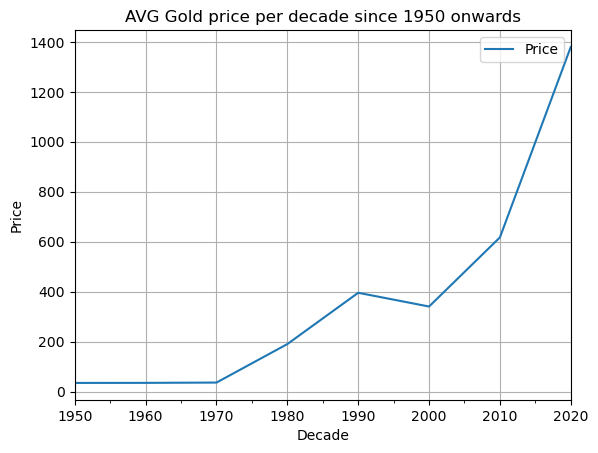

In [42]:
#Avg gold price per decade since 1950
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot();
plt.title("AVG Gold price per decade since 1950 onwards")
plt.xlabel('Decade')
plt.ylabel('Price')
plt.grid()

In [54]:
# Analyzing coefficient of variation

df_1=df.groupby(df.index.year).mean().rename(columns= {'Price':'Mean'})
df_1=df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}), left_index=True, right_index=True)
df_1['Cov_pct']= ((df_1['Std']/df_1['Mean'])*100).round(2)
df_1.tail()

,Mean,Std,Cov_pct
month,,,
2016,1248.161833,73.454098,5.88
2017,1257.848583,32.529524,2.59
2018,1269.852583,54.900304,4.32
2019,1392.585750,94.198272,6.76
2020,1674.830857,98.431766,5.88


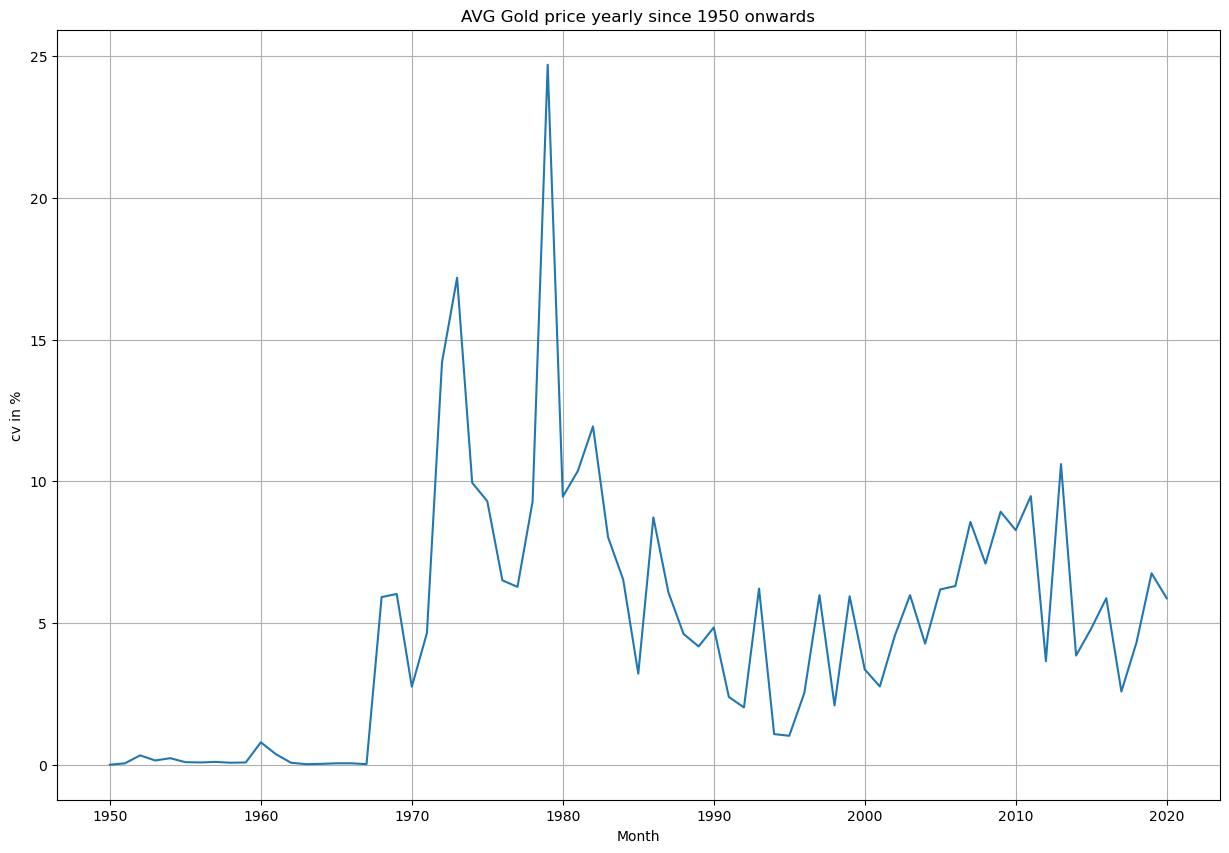

In [136]:
#Coefficient of Variation
fig, ax = plt.subplots(figsize=(15,10))
df_1['Cov_pct'].plot()
plt.title("AVG Gold price yearly since 1950 onwards")
plt.xlabel('Month')
plt.ylabel('cv in %')
plt.grid()

In [58]:
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]

In [60]:
print(train.shape)

(792, 1)


In [61]:
print(test.shape)

(55, 1)


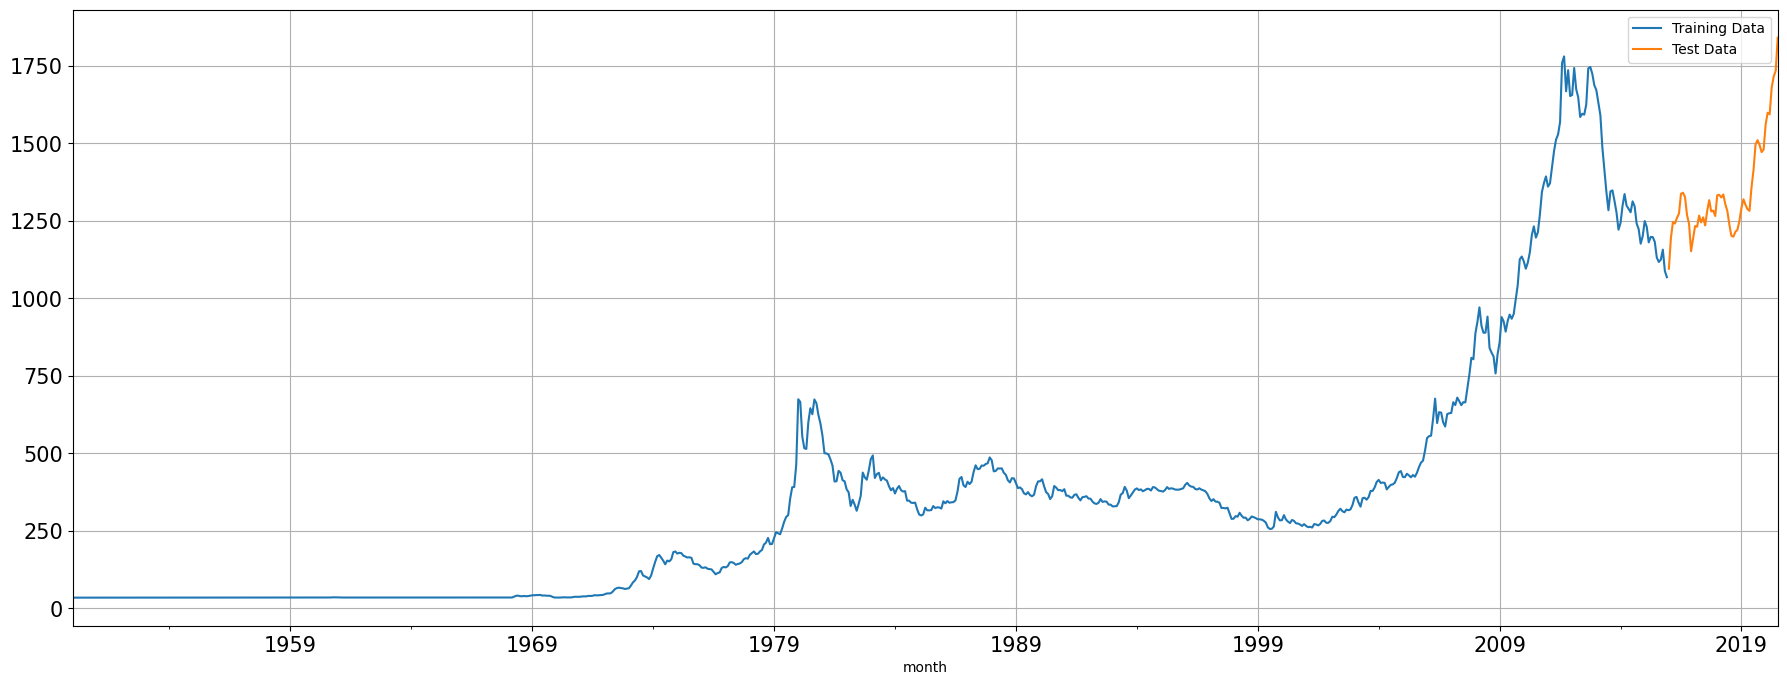

In [65]:
train["Price"].plot(figsize=(22,8), fontsize=15)
test["Price"].plot(figsize=(22,8), fontsize=15)
plt.grid()
plt.legend(['Training Data', 'Test Data'])


In [67]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time), len(test_time)

(792, 55)

In [68]:
LR_train = train.copy()
LR_test =  test.copy()

In [71]:
LR_train['time'] = train_time
LR_test['time'] = test_time

In [130]:
lr = LinearRegression()
lr.fit(LR_train[['time']], LR_train['Price'].values) 

LinearRegression()

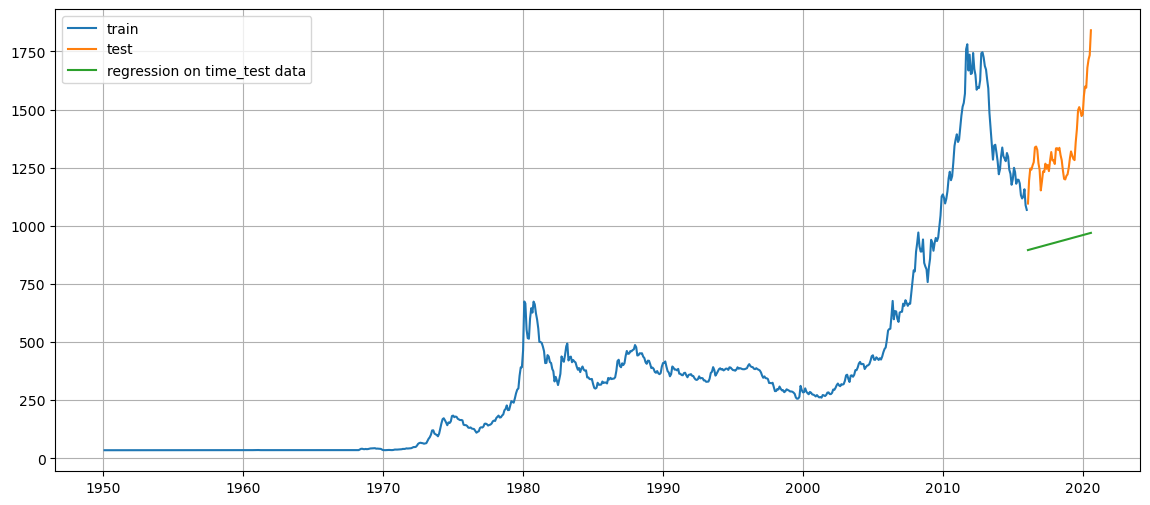

In [118]:
test_predictions_model1 = lr.predict(LR_test[['time']])
LR_test['forecast'] =  test_prediction_model1

plt.figure(figsize=(14,6))
plt.plot(train['Price'], label='train')
plt.plot(test['Price'], label='test')
plt.plot(LR_test['forecast'], label='regression on time_test data')
plt.legend(loc = 'best')
plt.grid()

In [134]:
def mape(actual, pred):
    return round((np.mean(abs(actual - pred)/actual))*100, 2)


In [135]:
mape_model1_test = mape(test['Price'].values,test_predictions_model1)
print("Mape is %3.3f"%(mape_model1_test),"%")

Mape is 29.630 %


In [120]:
results = pd.DataFrame({'Test Mape (%)': [mape_model1_test]}, index=['RegressionOnTime'])
results

,Test Mape (%)
RegressionOnTime,29.63


In [121]:
naive_train = train.copy()
naive_test = test.copy()

In [122]:
naive_test['naive']= np.asarray(train["Price"])[len(np.asarray(train["Price"]))-1]
naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

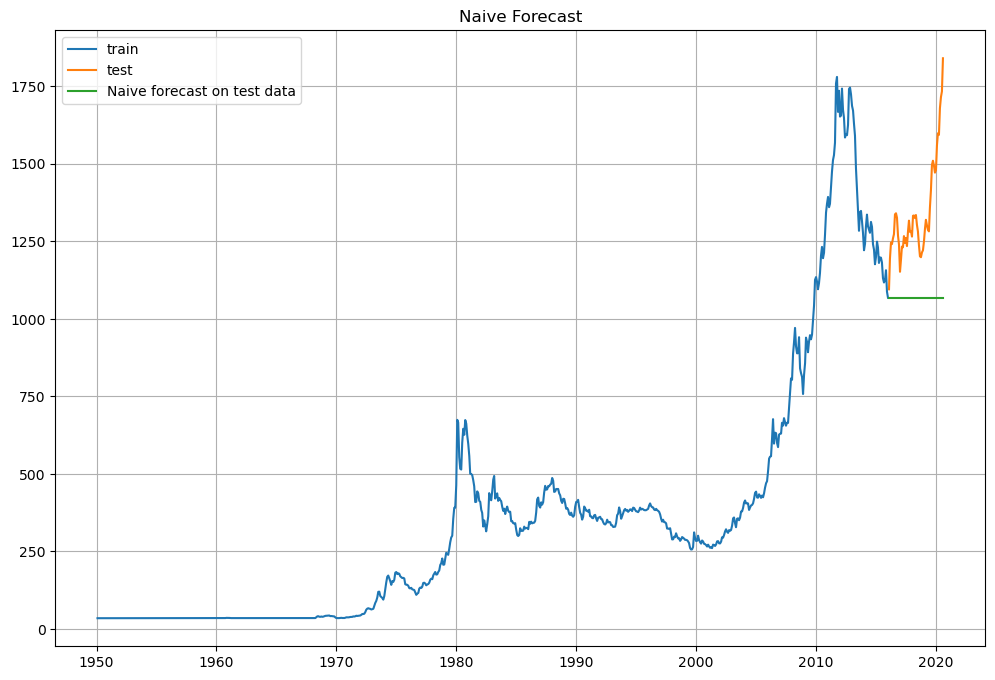

In [112]:
plt.figure(figsize=(12,8))
plt.plot(naive_train['Price'], label='train')
plt.plot(test['Price'], label='test')
plt.plot(naive_test['naive'], label='Naive forecast on test data')
plt.legend(loc = 'best')
plt.title("Naive Forecast")
plt.grid()

In [123]:
mape_model2_test = mape(test['Price'].values, naive_test['naive'].values)
print("For naive forecast on test data, Mape is %3.3f"%(mape_model2_test),"%")


For naive forecast on test data, Mape is 19.380 %


In [124]:
resultdf_2 = pd.DataFrame({'Test MAPE (%)': [mape_model2_test]}, index=['NaiveModel'])
results = pd.concat([results, resultdf_2])
results

,Test Mape (%),Test MAPE (%)
RegressionOnTime,29.63,NaN
NaiveModel,NaN,19.38


In [125]:
#Final Model

final_model = ExponentialSmoothing(df,
                                 trend = 'additive',
                                 seasonal = 'additive').fit(smoothing_level = 0.4,
                                                          smoothing_trend = 0.3,
                                                          smoothing_seasonal = 0.6)

In [126]:
mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print('Mape:', mape_final_model)

Mape: 17.24


In [127]:
prediction = final_model.forecast(steps=len(test))

In [110]:
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(final_model.resid,ddof=1),
                       'prediction': prediction,
                       'upper_CI':prediction+ 1.96*np.std(final_model.resid,ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.718274,1792.869246,1901.020219
2020-09-30,1615.301815,1723.452788,1831.603760
2020-10-31,1538.560879,1646.711851,1754.862823
2020-11-30,1476.748832,1584.899804,1693.050776
2020-12-31,1459.315210,1567.466182,1675.617154


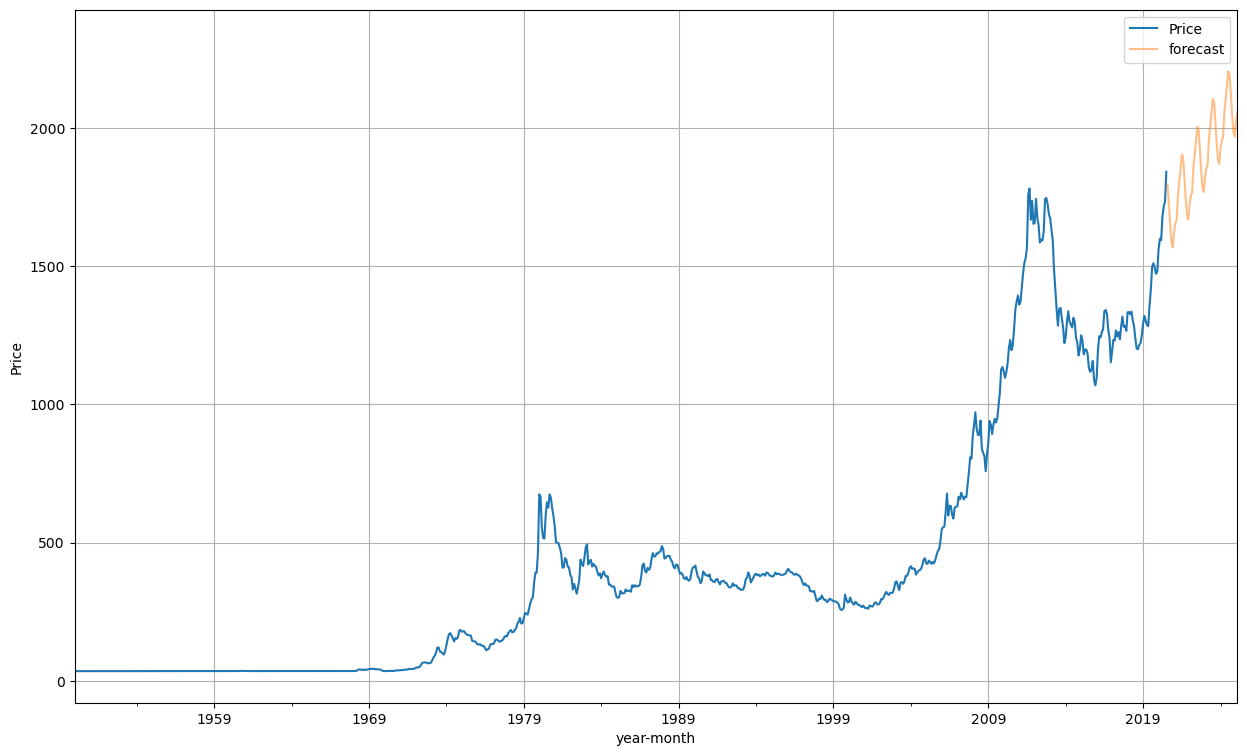

In [128]:
axis= df.plot(label = 'Actual', figsize=(15,9))
pred_df['prediction'].plot(ax = axis, label = 'forecast', alpha = 0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color = 'm', alpha= .15)
axis.set_xlabel('year-month')
axis.set_ylabel('Price')
plt.legend(loc = 'best')
plt.grid()
plt.show()